In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM



In [5]:
data_df = pd.read_csv("/Users/shibhanisrinivas/InterviewKickstart/Week2/New York Exchange Dataset/prices-split-adjusted.csv", index_col="date")
data_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
df2 = pd.read_csv("/Users/shibhanisrinivas/InterviewKickstart/Week2/New York Exchange Dataset/fundamentals.csv", index_col=0)
df2.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [9]:
# df2['Ticker Symbol'].value_counts()
data_df['symbol'].value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [11]:
data_df_oracle = data_df[data_df['symbol']=="ORCL"]
data_df_oracle.drop(['symbol'], axis=1, inplace=True)
data_df_oracle.head()

/var/folders/09/dqztqr2j1lx8pb_tkn_zl8p80000gp/T/ipykernel_24043/1653000270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_oracle.drop(['symbol'], axis=1, inplace=True)


,open,close,low,high,volume
date,,,,,
2010-01-04,24.660000,24.850000,24.660000,25.190001,26795000.0
2010-01-05,24.719999,24.820000,24.350000,24.850000,28669900.0
2010-01-06,24.770000,24.459999,24.379999,24.920000,24560700.0
2010-01-07,24.459999,24.379999,24.080000,24.610001,30469700.0
2010-01-08,24.280001,24.680000,24.250000,24.750000,23542400.0


In [14]:
data_df_oracle.columns, data_df_oracle.index

(Index(['open', 'close', 'low', 'high', 'volume'], dtype='object'),
 Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
        '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
        ...
        '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
        '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
       dtype='object', name='date', length=1762))

In [15]:
data_df_oracle.index = pd.to_datetime(data_df_oracle.index)
data_df_oracle.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,24.660000,24.850000,24.660000,25.190001,26795000.0
2010-01-05,24.719999,24.820000,24.350000,24.850000,28669900.0
2010-01-06,24.770000,24.459999,24.379999,24.920000,24560700.0
2010-01-07,24.459999,24.379999,24.080000,24.610001,30469700.0
2010-01-08,24.280001,24.680000,24.250000,24.750000,23542400.0


In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
data_df_oracle_scaled = scaler.fit_transform(data_df_oracle['close'].values.reshape(-1,1))
data_df_oracle_scaled[0:10]

array([[0.13685914],
       [0.135648  ],
       [0.12111425],
       [0.11788453],
       [0.129996  ],
       [0.13039975],
       [0.12515139],
       [0.13484053],
       [0.15664113],
       [0.15260399]])

In [46]:
## Split data into train, val and test

train_len = int(len(data_df_oracle_scaled) * 0.7)
test_len = int(len(data_df_oracle_scaled) - train_len)
# train_len, test_len

data_train = data_df_oracle_scaled[:train_len,0]
data_test = data_df_oracle_scaled[train_len:,0]

data_train.shape, data_test.shape, len(data_df_oracle_scaled)

((1233,), (529,), 1762)

In [47]:
## Create the train and test data matrix
def create_data_matrix(data, look_back=15):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        sample = data[i:(i+look_back)]
        X.append(sample)
        y.append(data[(i+look_back)])
    return np.array(X), np.array(y)

In [48]:
X_train, y_train = create_data_matrix(data_train)
X_test, y_test = create_data_matrix(data_test)

(X_train.shape), (y_train.shape), (X_test.shape), (y_test.shape)

((1217, 15), (1217,), (513, 15), (513,))

In [49]:
## Reshaping the matrices into [samples, time step, features] for LSTM
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))

X_train.shape, X_test.shape

((1217, 1, 15), (513, 1, 15))

In [50]:
## Build the LSTM architecture
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1,look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20


2024-04-11 11:00:22.028658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-11 11:00:22.030217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-11 11:00:22.030981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1217/1217 - 2s - loss: 0.0107 - 2s/epoch - 2ms/step
Epoch 2/20
1217/1217 - 1s - loss: 0.0013 - 936ms/epoch - 769us/step
Epoch 3/20
1217/1217 - 1s - loss: 0.0010 - 909ms/epoch - 747us/step
Epoch 4/20
1217/1217 - 1s - loss: 9.3447e-04 - 904ms/epoch - 743us/step
Epoch 5/20
1217/1217 - 1s - loss: 8.0786e-04 - 907ms/epoch - 745us/step
Epoch 6/20
1217/1217 - 1s - loss: 8.1550e-04 - 971ms/epoch - 797us/step
Epoch 7/20
1217/1217 - 1s - loss: 7.3127e-04 - 919ms/epoch - 755us/step
Epoch 8/20
1217/1217 - 1s - loss: 7.1990e-04 - 906ms/epoch - 744us/step
Epoch 9/20
1217/1217 - 1s - loss: 6.2436e-04 - 903ms/epoch - 742us/step
Epoch 10/20
1217/1217 - 1s - loss: 6.3643e-04 - 904ms/epoch - 743us/step
Epoch 11/20
1217/1217 - 1s - loss: 6.0315e-04 - 904ms/epoch - 743us/step
Epoch 12/20
1217/1217 - 1s - loss: 5.9320e-04 - 902ms/epoch - 741us/step
Epoch 13/20
1217/1217 - 1s - loss: 5.8200e-04 - 898ms/epoch - 738us/step
Epoch 14/20
1217/1217 - 1s - loss: 5.9734e-04 - 898ms/epoch - 738us/step
Epoch 15/20
121

In [60]:
## Predictions

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# print("trainPredict: ", trainPredict)
# print("testPredict: ", testPredict)

# invert scaler for predictions 
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
print("trainPredict: ", len(trainPredict))
print("testPredict: ", len(testPredict))

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

17/17 [==============================] - 0s 669us/step
trainPredict:  1217
testPredict:  513
Train Score: 0.51 RMSE
Test Score: 0.62 RMSE


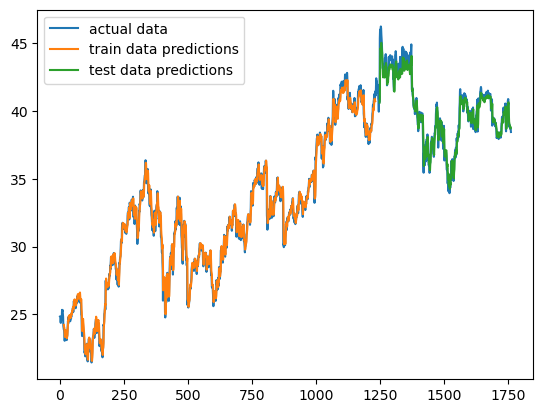

In [64]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_df_oracle_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_df_oracle_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data_df_oracle_scaled)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_df_oracle_scaled), label="actual data")
plt.plot(trainPredictPlot, label="train data predictions")
plt.plot(testPredictPlot, label="test data predictions")
plt.legend()
plt.show()